In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('handwriting.csv')

In [13]:
d = data.iloc[:, 0].values
X = data.iloc[:, 1:].values
y = d % 2

In [35]:
def image_data(X, i):
    return X[i].reshape(28, 28)

def indicator(d, v):
    return [1 if di in v else -1 for di in d]

def func_loss(wbar, mu, X, y):
    w_0 = wbar[0]
    w = wbar[1:]
    return mu * np.linalg.norm(w, 2)**2 + np.mean(np.maximum(1 - y * (w_0 + X.dot(w))))

def grad_loss(wbar, mu, X, y):
    w_0 = wbar[0]
    w = wbar[1:]
    N = len(wbar)
    mask = 1 - y * (w_0 + X.dot(w)) >= 0
    
    subgradient = np.zeros(N)
    subgradient[0] = -np.mean(y[mask])
    subgradient[1:] = 2 * mu * w - np.mean(y[mask] * X[mask], axis=0)

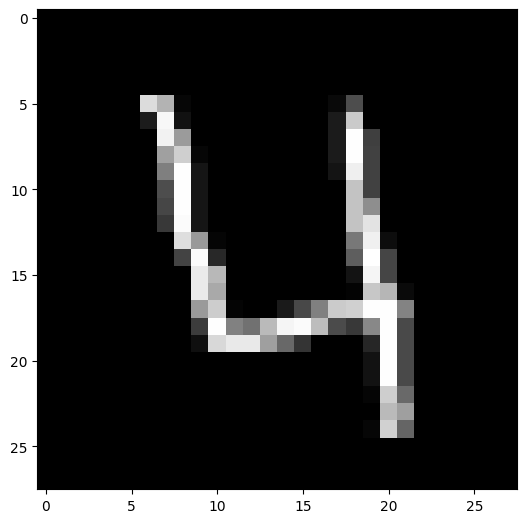

In [21]:
axes = plt.figure().add_axes((0, 0, 1, 1))
i=3
axes.imshow(image_data(X, i), cmap='gray')
plt.show()